# Source for Code and Slides
https://amueller.github.io/COMS4995-s20/slides/aml-21-time-series/#1

https://github.com/amueller/COMS4995-s20/blob/master/slides/aml-21-time-series/aml-25-time-series.ipynb


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = 'tight'
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [ ]:
# This is monthly data since 1958
# columns = ["year", "month", "decimal date", "average", "interpolated", "trend", "?"]
# co2 = pd.read_csv("ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt",
#                   delim_whitespace=True, skiprows=72, names=columns, parse_dates=[[0, 1]])

# <font color = 'pickle'> **Tasks**

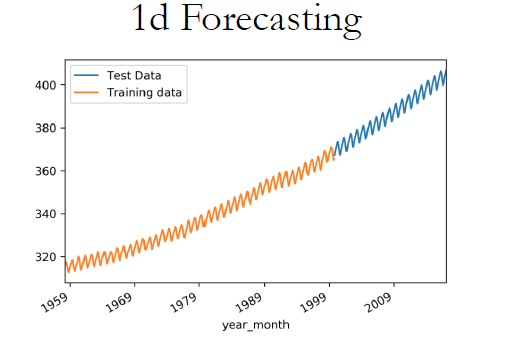

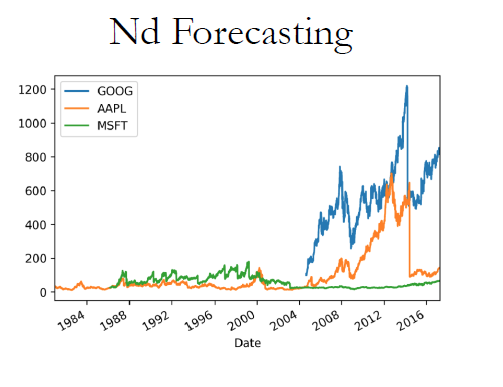

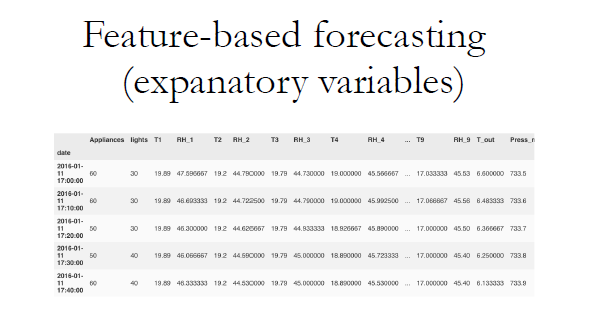

# <font color = 'pickle'> **What is different?** 



- Not iids

# <font color = 'pickle'> **Preliminaries**

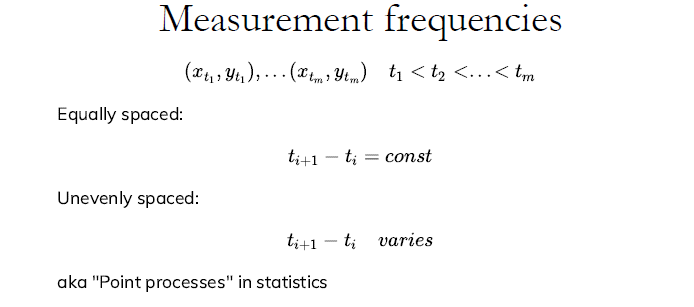

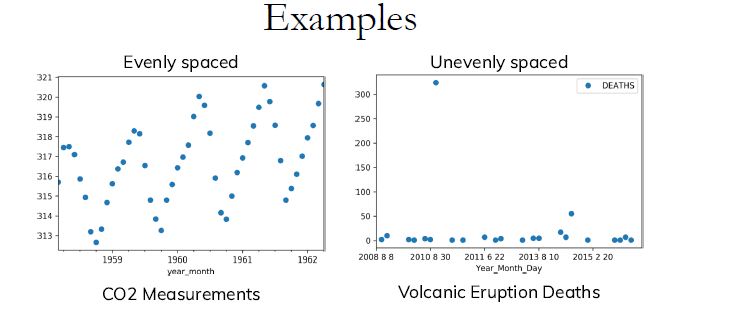

# <font color = 'pickle'> **Data reading / munging with Pandas**

In [ ]:
# this here is weekly data since 1974
# see https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html
url = "ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_weekly_mlo.txt"
names = ["year", "month", "day", "year_decimal", "co2", "days", "1 yr ago",
          "10 yr ago", "since 1800"]
maunaloa = pd.read_csv(url, skiprows=49, header=None, delim_whitespace=True,
                       names=names, na_values=[-999.99])
maunaloa.head()

,year,month,day,year_decimal,co2,days,1 yr ago,10 yr ago,since 1800
0,1974,5,19,1974.3795,333.37,5,NaN,NaN,50.39
1,1974,5,26,1974.3986,332.95,6,NaN,NaN,50.05
2,1974,6,2,1974.4178,332.35,5,NaN,NaN,49.59
3,1974,6,9,1974.4370,332.20,7,NaN,NaN,49.64
4,1974,6,16,1974.4562,332.37,7,NaN,NaN,50.06


## <font color = 'pickle'> **Parse Dates**



In [ ]:
maunaloa = pd.read_csv(url, skiprows=49, header=None, delim_whitespace=True,
                       names=names, parse_dates=[[0, 1, 2]], na_values=[-999.99])
maunaloa.head()

,year_month_day,year_decimal,co2,days,1 yr ago,10 yr ago,since 1800
0,1974-05-19,1974.3795,333.37,5,NaN,NaN,50.39
1,1974-05-26,1974.3986,332.95,6,NaN,NaN,50.05
2,1974-06-02,1974.4178,332.35,5,NaN,NaN,49.59
3,1974-06-09,1974.4370,332.20,7,NaN,NaN,49.64
4,1974-06-16,1974.4562,332.37,7,NaN,NaN,50.06


## <font color = 'pickle'> **Time Series Index**

In [ ]:
maunaloa = pd.read_csv(url, skiprows=49, header=None, delim_whitespace=True,
                       names=names, parse_dates=[[0, 1, 2]], na_values=[-999.99],
                       index_col="year_month_day")
maunaloa.head()

,year_decimal,co2,days,1 yr ago,10 yr ago,since 1800
year_month_day,,,,,,
1974-05-19,1974.3795,333.37,5,NaN,NaN,50.39
1974-05-26,1974.3986,332.95,6,NaN,NaN,50.05
1974-06-02,1974.4178,332.35,5,NaN,NaN,49.59
1974-06-09,1974.4370,332.20,7,NaN,NaN,49.64
1974-06-16,1974.4562,332.37,7,NaN,NaN,50.06


In [ ]:
maunaloa.co2.head()


year_month_day
1974-05-19    333.37
1974-05-26    332.95
1974-06-02    332.35
1974-06-09    332.20
1974-06-16    332.37
Name: co2, dtype: float64

Text(0, 0.5, 'CO2 ppm')

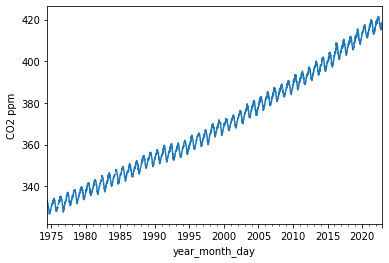

In [ ]:
maunaloa.co2.plot()
plt.ylabel("CO2 ppm")
# plt.savefig("images/maunaloa plot.png")

In [ ]:
# set index frequency for statsmodel models
maunaloa.index = pd.DatetimeIndex(maunaloa.index, freq=maunaloa.index.inferred_freq)

In [ ]:
maunaloa.head()

,year_decimal,co2,days,1 yr ago,10 yr ago,since 1800
year_month_day,,,,,,
1974-05-19,1974.3795,333.37,5,NaN,NaN,50.39
1974-05-26,1974.3986,332.95,6,NaN,NaN,50.05
1974-06-02,1974.4178,332.35,5,NaN,NaN,49.59
1974-06-09,1974.4370,332.20,7,NaN,NaN,49.64
1974-06-16,1974.4562,332.37,7,NaN,NaN,50.06


## <font color = 'pickle'> **Backfill and forward fill**

In [ ]:
maunaloa.co2.isnull().sum()


18

In [ ]:
maunaloa.fillna(method="ffill", inplace=True)  # or bfill
maunaloa.co2.isnull().sum()

0

## <font color = 'pickle'> **Resampling**

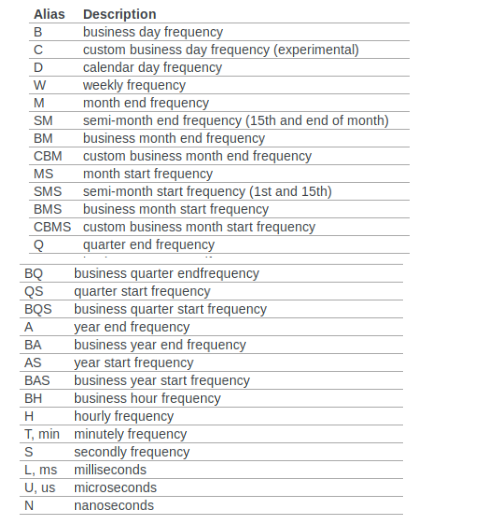

In [ ]:
# resampling is lazy
resampled_co2 = maunaloa.co2.resample("MS")
resampled_co2

In [ ]:
resampled_co2.mean().head()

year_month_day
1974-05-01    333.1600
1974-06-01    332.0680
1974-07-01    330.7150
1974-08-01    329.0975
1974-09-01    327.3280
Freq: MS, Name: co2, dtype: float64

In [ ]:
maunaloa.co2.rename('W')

year_month_day
1974-05-19    333.37
1974-05-26    332.95
1974-06-02    332.35
1974-06-09    332.20
1974-06-16    332.37
               ...  
2022-10-23    416.30
2022-10-30    416.43
2022-11-06    417.18
2022-11-13    417.29
2022-11-20    418.53
Freq: W-SUN, Name: W, Length: 2532, dtype: float64

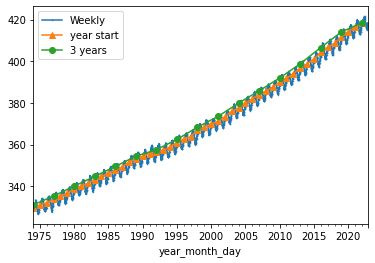

In [ ]:
maunaloa.co2.resample("W").mean().rename("Weekly").plot(marker=".", markersize=1)
maunaloa.co2.resample("AS").mean().rename("year start").plot(marker="^")
maunaloa.co2.resample("3AS").mean().rename("3 years").plot(marker="o")
plt.legend()
# plt.savefig("images/maunaloa resample.png")

# <font color = 'pickle'> **1d Forecasting Basics**

## <font color = 'pickle'> **Stationarity**
- Required for some classical statistics methods
- Mean independent of time
- Variance independent of time
- Covariance of two observations k steps apart independent of time

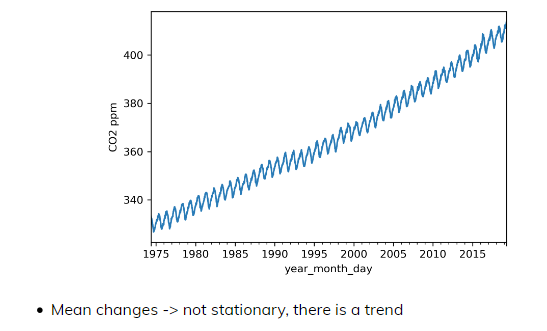

## <font color = 'pickle'> **Autocorrelation**

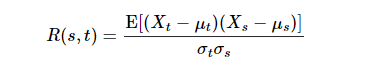

In [ ]:
ppm = maunaloa.co2
ppm.autocorr()

0.9997605653291393

In [ ]:
ppm.autocorr(lag=26)

0.9861144171595615

In [ ]:
ppm.autocorr(lag=52)

0.9995439848210206

###  <font color = 'pickle'> **Autocorrelation Function**

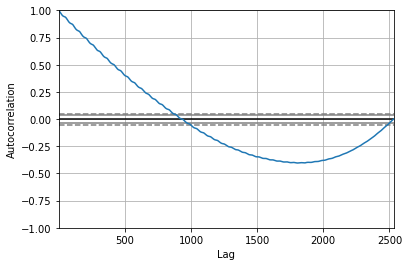

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ppm)
# plt.savefig("images/autocorr.png")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


Text(0.5, 0, 'lag')

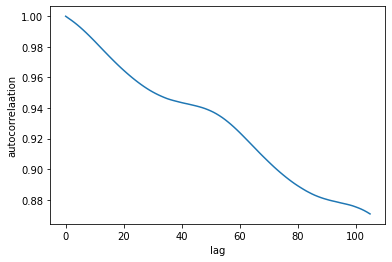

In [ ]:
from statsmodels.tsa.stattools import acf
autocorrelation = acf(ppm, nlags=105)
plt.plot(autocorrelation)
plt.ylabel("autocorrelaation")
plt.xlabel("lag")
# plt.savefig("images/autocorr 2.png")

## <font color = 'pickle'> **Detrending**

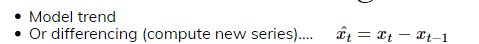

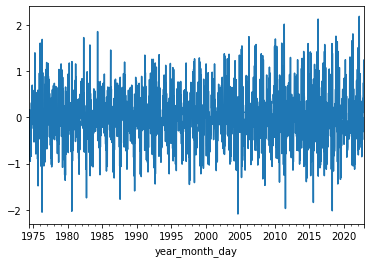

In [ ]:
ppm.diff().plot()
# plt.savefig("images/detrending.png")

### <font color = 'pickle'> **Autocorrelation of differenced series**

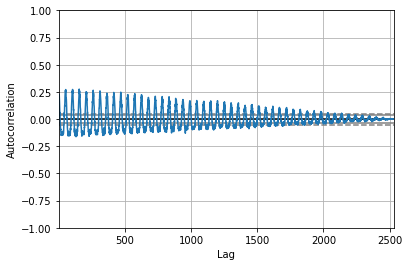

In [ ]:
autocorrelation_plot(ppm.diff()[1:])
# plt.savefig("images/autocorr 3.png")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


Text(0.5, 0, 'lag')

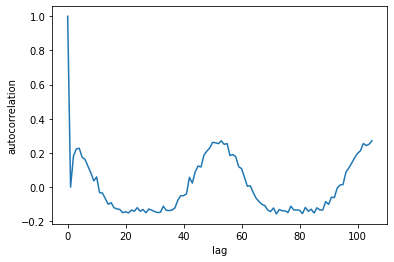

In [ ]:
from statsmodels.tsa.stattools import acf
autocorrelation = acf(ppm.diff()[1:], nlags=105)
plt.plot(autocorrelation)
plt.ylabel("autocorrelation")
plt.xlabel("lag")
# plt.savefig("images/autocorr 4.png")

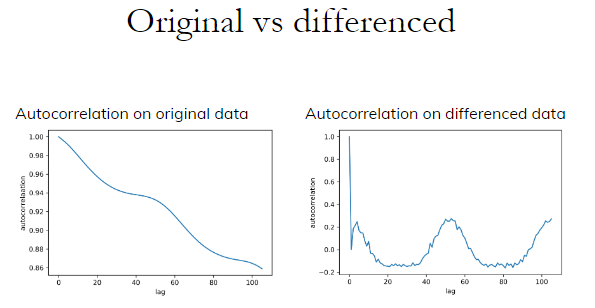

In [ ]:
aapl = pd.read_csv("https://github.com/scikit-learn/examples-data/raw/master/financial-data/AAPL.csv")

In [ ]:
aapl.head()

,date,open,close
0,2003-01-02,14.36,14.80
1,2003-01-03,14.80,14.90
2,2003-01-06,15.03,14.90
3,2003-01-07,14.79,14.85
4,2003-01-08,14.58,14.55


In [ ]:
aapl.set_index("date", inplace=True)
aapl.sort_index(inplace=True)

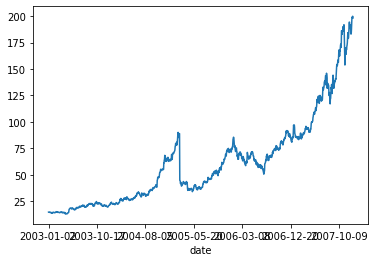

In [ ]:
aapl.close.plot()

In [ ]:
msft = pd.read_csv("https://github.com/scikit-learn/examples-data/raw/master/financial-data/MSFT.csv", parse_dates=["date"], index_col='date')

In [ ]:
yhoo = pd.read_csv("https://github.com/scikit-learn/examples-data/raw/master/financial-data/YHOO.csv", parse_dates=["date"])

In [ ]:
yhoo.set_index("date", inplace=True)
yhoo.sort_index(inplace=True)

In [ ]:
combined_stock = pd.concat([yhoo.close, aapl.close, msft.close], axis=1)

In [ ]:
combined_stock.columns = ['YHOO', 'AAPL', 'MSFT']

In [ ]:
combined_stock

,YHOO,AAPL,MSFT
date,,,
2003-01-02,17.60,NaN,53.72
2003-01-03,18.10,NaN,53.79
2003-01-06,18.94,NaN,54.77
2003-01-07,19.15,NaN,55.80
2003-01-08,18.75,NaN,54.24
...,...,...,...
2007-12-24,24.05,NaN,36.58
2007-12-26,23.96,NaN,36.61
2007-12-27,23.71,NaN,35.97


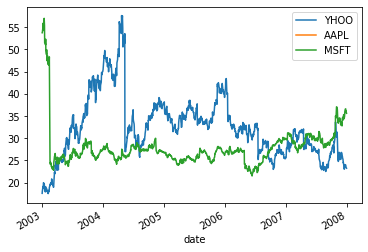

In [ ]:
combined_stock.plot()

In [ ]:
yhoo.close.autocorr()

0.9879423052246649

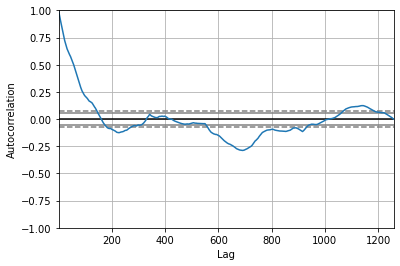

In [ ]:
autocorrelation_plot(yhoo)


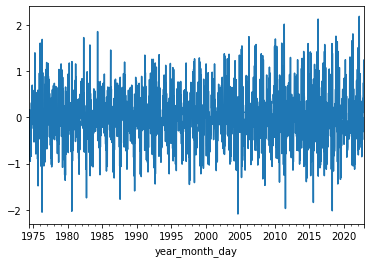

In [ ]:
ppm.diff().plot()

## <font color = 'pickle'> **Seasonal model for co2**

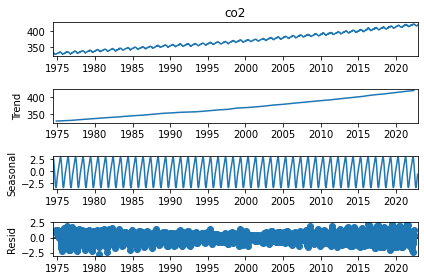

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ppm, model='additive')
fig = decomposition.plot()
#fig.set_figheight(6)
fig.tight_layout()

In [ ]:
ppm.shape

(2532,)

#<font color = 'pickle'> **Autoregressive models**

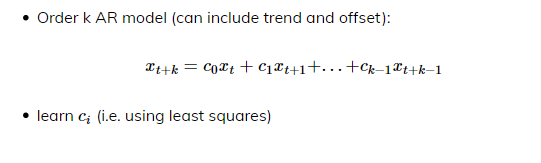

In [ ]:
from statsmodels.tsa import ar_model
# ar = ar_model.AR(ppm[:500])
ar = ar_model.AutoReg(ppm[:500], lags = 12, trend = 'n')
res = ar.fit()
res.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


co2.L1     0.800096
co2.L2     0.279817
co2.L3     0.164518
co2.L4     0.037007
co2.L5    -0.044419
co2.L6    -0.050469
co2.L7    -0.143866
co2.L8    -0.104960
co2.L9    -0.067878
co2.L10    0.034604
co2.L11   -0.009037
co2.L12    0.104630
dtype: float64

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


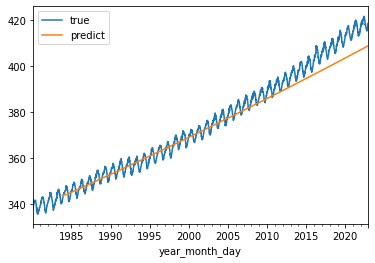

In [ ]:
ppm[300:].plot(label="true")
res.predict(ppm.index[500], ppm.index[-1]).plot(label="predict")
plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


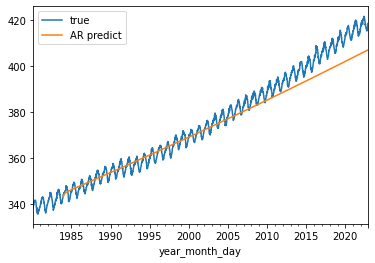

In [ ]:
ar6 = ar_model.AutoReg(ppm[:500], lags = 6, trend = 'n')
res6 = ar6.fit()
ar_pred_6 = res6.predict(ppm.index[500], ppm.index[-1])
ppm[300:].plot(label="true")
ar_pred_6.plot(label="AR predict")
plt.legend(loc="best")


## <font color = 'pickle'> **Impact of order**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


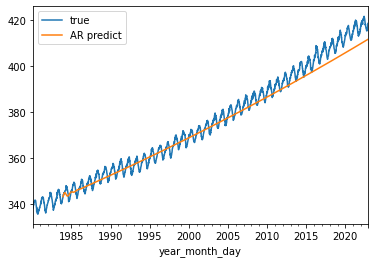

In [ ]:
ar25 = ar_model.AutoReg(ppm[:500], lags = 25, trend = 't')
res = ar25.fit()
ar_pred = res.predict(ppm.index[500], ppm.index[-1])
ppm[300:].plot(label="true")
ar_pred.plot(label="AR predict")
plt.legend(loc="best")



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a f

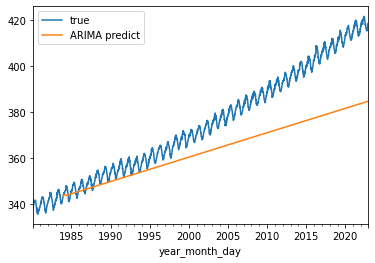

In [ ]:
from statsmodels import tsa

arima_model = tsa.arima_model.ARIMA(ppm[:500], order=(12, 1, 0))
res = arima_model.fit()
arima_pred = res.predict(ppm.index[500], ppm.index[-1], typ="levels")
ppm[300:].plot(label="true")
arima_pred.plot(label="ARIMA predict")
plt.legend(loc="best")

# <font color = 'pickle'> **1d with sklearn**

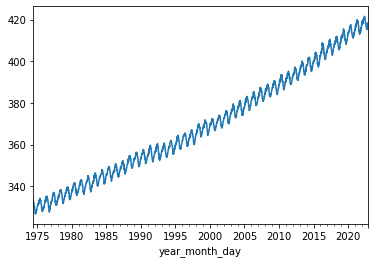

In [ ]:
ppm.plot()

In [ ]:
ppm.shape

(2532,)

In [ ]:
train = ppm[:500]
test = ppm[500:]

In [ ]:
train

year_month_day
1974-05-19    333.37
1974-05-26    332.95
1974-06-02    332.35
1974-06-09    332.20
1974-06-16    332.37
               ...  
1983-11-13    341.80
1983-11-20    342.05
1983-11-27    342.43
1983-12-04    342.62
1983-12-11    342.97
Freq: W-SUN, Name: co2, Length: 500, dtype: float64

In [ ]:
X = ppm.index.to_series().apply(lambda x: x.toordinal())
X = pd.DataFrame(X)

In [ ]:
X

,year_month_day
year_month_day,
1974-05-19,720762
1974-05-26,720769
1974-06-02,720776
1974-06-09,720783
1974-06-16,720790
...,...
2022-10-23,738451
2022-10-30,738458
2022-11-06,738465


In [ ]:
X_train, X_test = X.iloc[:500, :], X.iloc[500:, :]
X_train.shape

## <font color = 'pickle'> **Linear Trend**

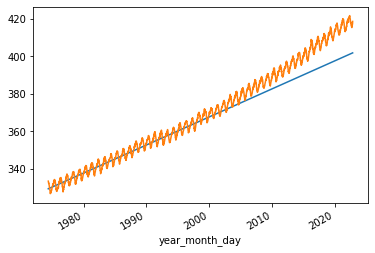

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, train)
lr_pred = lr.predict(X_test)
plt.plot(ppm.index, lr.predict(X))
ppm.plot()

## <font color = 'pickle'> **Quadratic Trend**

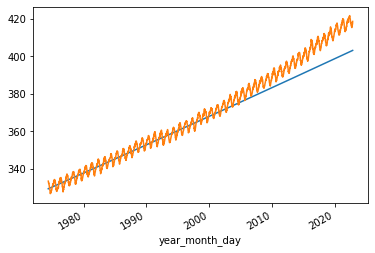

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
lr_poly = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())
lr_poly.fit(X_train, train)

plt.plot(ppm.index, lr_poly.predict(X))
ppm.plot()

## <font color = 'pickle'> **cross-validation**

In [ ]:
X_train.head()

,year_month_day
year_month_day,
1974-05-19,720762
1974-05-26,720769
1974-06-02,720776
1974-06-09,720783
1974-06-16,720790


In [ ]:
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
scores_iid = cross_val_score(LinearRegression(), X_train, train, cv=10,
                             scoring="neg_mean_squared_error")
np.mean(scores_iid)

-4.8456185786256265

In [ ]:
scores_time = cross_val_score(LinearRegression(), X_train, train, cv=TimeSeriesSplit(n_splits=10),
                              scoring="neg_mean_squared_error")
np.mean(scores_time)

-5.355949573997098

In [ ]:
from sklearn.tree import DecisionTreeRegressor
scores_iid = cross_val_score(DecisionTreeRegressor(), X_train, train, cv=10,
                              scoring="neg_mean_squared_error")
np.mean(scores_iid)

-9.192623000000008

In [ ]:
scores_time = cross_val_score(DecisionTreeRegressor(), X_train, train, cv=TimeSeriesSplit(n_splits=10),
                              scoring="neg_mean_squared_error")
np.mean(scores_time)

-11.265552444444435

In [ ]:
from sklearn.model_selection import cross_val_predict
asdf = cross_val_predict(LinearRegression(), X_train.values, train.values, cv=10)

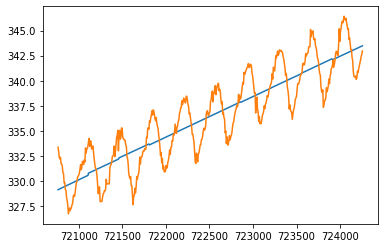

In [ ]:
plt.plot(X_train, asdf)
plt.plot(X_train, train)

In [ ]:
X_month = pd.concat([X, pd.DataFrame({'month': X.index.month}, index=X.index)], axis=1)

In [ ]:
X_month.head()

,year_month_day,month
year_month_day,,
1974-05-19,720762,5
1974-05-26,720769,5
1974-06-02,720776,6
1974-06-09,720783,6
1974-06-16,720790,6


In [ ]:
X_train_month = X_month[:500]
X_test_month = X_month[500:]
lr_poly_month = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())
lr_poly_month.fit(X_train_month, train)
X_test_month.shape

(2032, 2)

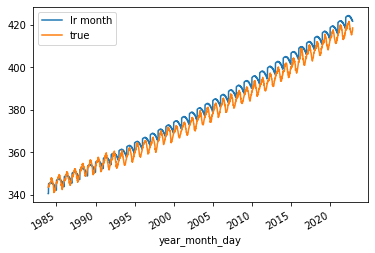

In [ ]:
plt.plot(ppm.index[500:], lr_poly_month.predict(X_test_month), label="lr month")

ppm[500:].plot(label="true")
plt.legend(loc="best")

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([
        ("cat", OneHotEncoder(sparse=False), ['month'])],
        remainder='passthrough')
lr_poly_month_ohe = make_pipeline(preprocessor,
                                  PolynomialFeatures(include_bias=False), 
                                  LinearRegression())
lr_poly_month_ohe.fit(X_train_month, train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(sparse=False),
                                                  ['month'])])),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

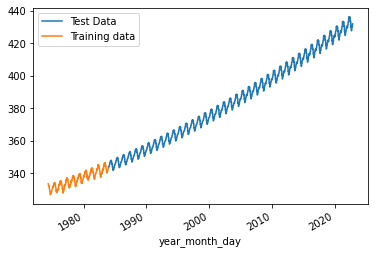

In [ ]:
plt.plot(ppm.index[500:], lr_poly_month_ohe.predict(X_test_month), label="lr month")
ppm[:500].plot()
plt.legend(["Test Data", "Training data"])

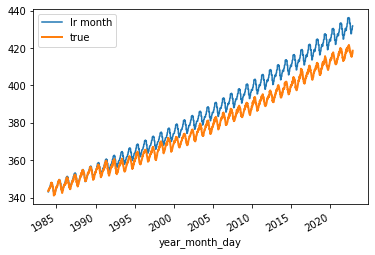

In [ ]:
plt.plot(ppm.index[500:], lr_poly_month_ohe.predict(X_test_month), label="lr month")

ppm[500:].plot(label="true", ax=plt.gca(), linewidth=2)
plt.legend(loc="best")


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ppm[500:], lr_poly_month_ohe.predict(X_test_month))

63.94507599789148

# <font color = 'pickle'> **FBProphet**

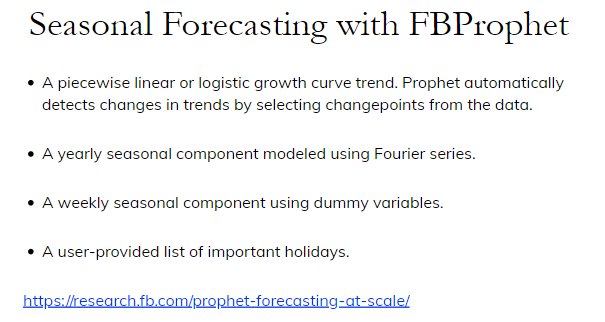

In [ ]:
fb_ppm = pd.DataFrame(ppm).reset_index()
fb_ppm.columns = ['ds', 'y']

In [ ]:
fb_ppm.head()

,ds,y
0,1974-05-19,333.37
1,1974-05-26,332.95
2,1974-06-02,332.35
3,1974-06-09,332.20
4,1974-06-16,332.37


In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 6.8 MB/s 
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [ ]:
from prophet import Prophet
m = Prophet()
m.fit(fb_ppm[:500])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkh52ka3_/iy_n89tm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkh52ka3_/4bpmsr8i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58474', 'data', 'file=/tmp/tmpkh52ka3_/iy_n89tm.json', 'init=/tmp/tmpkh52ka3_/4bpmsr8i.json', 'output', 'file=/tmp/tmpkh52ka3_/prophet_modeljn1obotz/prophet_model-20221128115929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:59:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:59:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = m.predict(fb_ppm)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2527,2022-10-23,404.663526,237.413608,576.404848
2528,2022-10-30,404.941337,237.276986,576.470348
2529,2022-11-06,405.224455,237.621674,577.095050
2530,2022-11-13,405.515410,237.617488,577.637281
2531,2022-11-20,405.809477,238.149098,578.000631


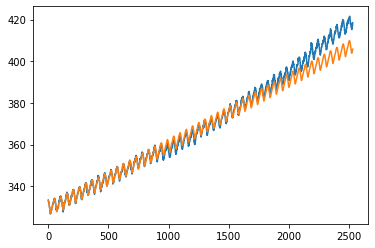

In [ ]:
fb_ppm.y.plot()
forecast.yhat.plot()
# plt.savefig("images/prophet_forecast.png")

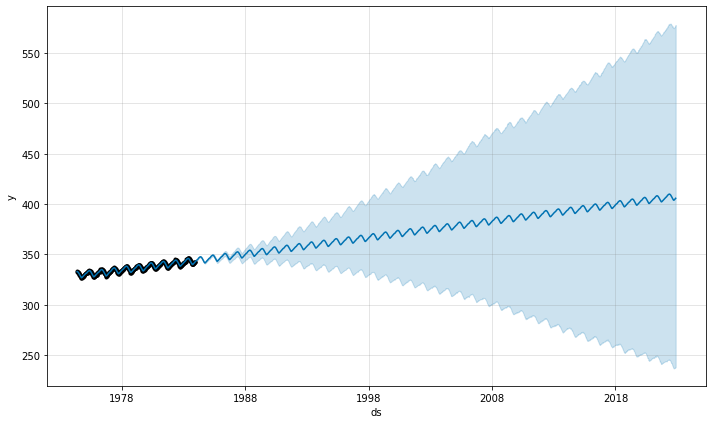

In [ ]:
m.plot(forecast);
#plt.savefig("images/prophet_forecast_uncertainty.png")

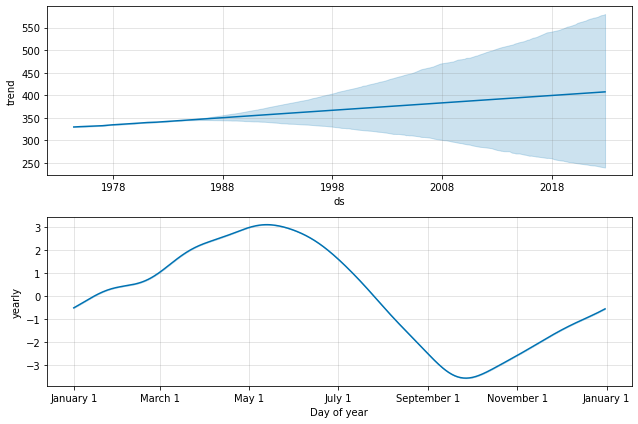

In [ ]:
m.plot_components(forecast);
# plt.savefig("images/prophet_forecast_components.png")